Demo notebook for qp, showing two different ways of storing a PDF, one from a grid, and one from samples from the distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
%matplotlib inline

Make some fake data, just two Gaussian humps, using scipy.stats.norm, use scipy.stats.pdf to get the distributions evaluated at a grid of points

In [41]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000.*0.1
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000.*0.1
bothy = y1+y2

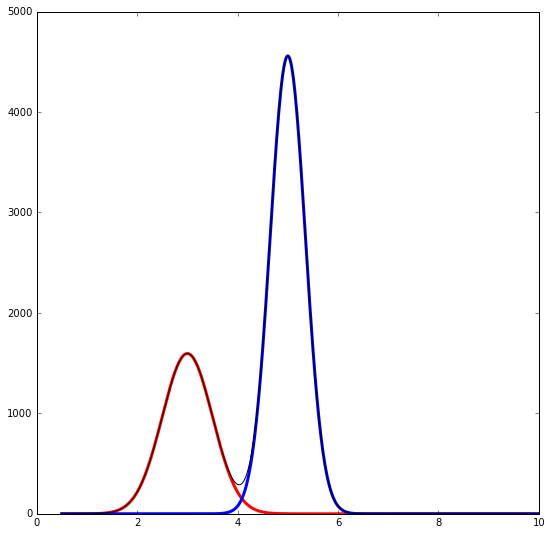

In [43]:
fig = plt.figure(figsize=(9,9))
plt.plot(x,y1,lw=3,c='r')
plt.plot(x,y2,lw=3,c='b')
plt.plot(x,bothy,lw=1,c='k')

Now, generate samples from these two distributions and add them together, 

In [32]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))

append samples into one bit list, plot on same plot as the two Gaussians

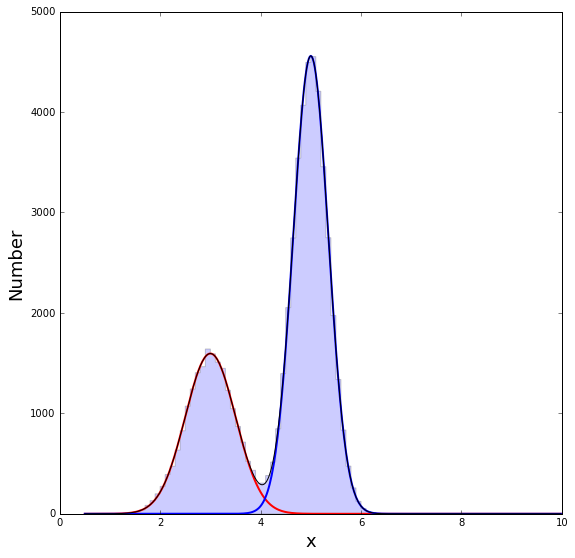

In [55]:
bigsample = np.append(samples1,samples2)
binsize = 0.1
fig = plt.figure(figsize=(9,9))
plt.hist(bigsample, normed=False, histtype='stepfilled', alpha=0.2,bins = np.arange(0.5,10,binsize))
plt.plot(x,y1,lw=2,c='r')
plt.plot(x,y2,lw=2,c='b')
plt.plot(x,bothy,lw=1,c='k')
plt.xlabel("x",fontsize=18)
plt.ylabel("Number",fontsize=18)

Now we have the double Gaussian described both on a grid and via 60,000 samples from the distributions, create qp objects for each.  qp.PDF (line 26 of qp.py) does most of the heavy lifting here.  You can create a qp object with using = 'gridded', 'quantiles', 'samples', 'histogram', or 'truth'.  We'll just do gridded and samples here.  Gridded you feed in a tuple of the (xarrayvals,yarrayvals), for samples you feed in the numpy array of samples.  See the __init__ function of qp.PDF on line 28 of qp.py for details.

In [46]:
gridobj = qp.PDF(gridded=(x,bothy))

In [48]:
samplesobj = qp.PDF(samples=bigsample)

plot them both to see that they look decent as read in by qp

Plotted gridded.


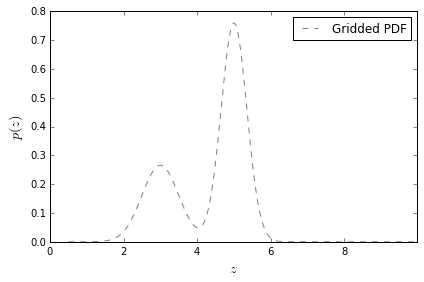

In [49]:
gridobj.plot()

Created a KDE interpolator for the samples parametrization.
interpolating between 1.0143054904 and 6.38122219629 using samples
Plotted samples


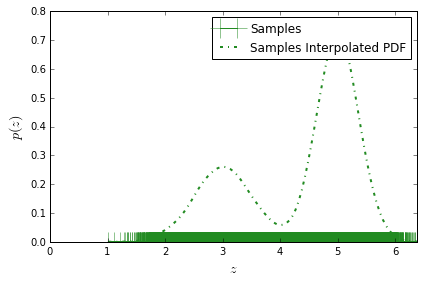

In [50]:
samplesobj.plot()

Test a simple integral from 0 to 6 of each

In [52]:
gridinteg = gridobj.integrate(limits=(0.0,6.0),using='gridded')
print (gridinteg)

Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 6.0 using gridded
0.998578012819


In [53]:
samplesinteg = samplesobj.integrate(limits=(0.0,6.0),using='samples')
print(samplesinteg)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 6.0 using samples
0.997664625044


Note that the qp codebase, when you call with using='samples' you get a message about interpolation, this is because integrate calls qp.evaluate (line 183 of qp.py), which with samples calls qp.approximate (line 147 of qp.py), which calls the interpolator (line 797 of qp.py), which for using='samples', calls a Gaussian kernel density estimator (line 728 of qp.py) to do the interpolation.  So, we end up back at Gaussians.  Because the Gaussian KDE is fitting a finite number of 60,000 points, the Gaussian parameters are slightly different, and our integral has a small difference from the answer we get from the "gridded" parameterization.